In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# Import Helpful Libraries

In [2]:
# Numpy and Pandas for statistics and DataSet
import numpy as np
import pandas as pd

# Seaborn and matplotlib for Graphs and Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import matplotlib

# To divide data into train and test set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Libraries for Machine Learning Algorithms
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Warning Library to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Load DataSet and Analysis it

In [3]:
train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train.shape, test.shape

((2000, 21), (1000, 21))

In [7]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Columns unique values
for col in train.columns:
    print("{} have {} unique values: ".format(col, train[col].nunique()))
print("*" * 35)
for col in train.columns:
    if train[col].nunique() <= 16:
        print("{}: {}".format(col, train[col].unique()))

battery_power have 1094 unique values: 
blue have 2 unique values: 
clock_speed have 26 unique values: 
dual_sim have 2 unique values: 
fc have 20 unique values: 
four_g have 2 unique values: 
int_memory have 63 unique values: 
m_dep have 10 unique values: 
mobile_wt have 121 unique values: 
n_cores have 8 unique values: 
pc have 21 unique values: 
px_height have 1137 unique values: 
px_width have 1109 unique values: 
ram have 1562 unique values: 
sc_h have 15 unique values: 
sc_w have 19 unique values: 
talk_time have 19 unique values: 
three_g have 2 unique values: 
touch_screen have 2 unique values: 
wifi have 2 unique values: 
price_range have 4 unique values: 
***********************************
blue: [0 1]
dual_sim: [0 1]
four_g: [0 1]
m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
n_cores: [2 3 5 6 1 8 4 7]
sc_h: [ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]
three_g: [0 1]
touch_screen: [0 1]
wifi: [1 0]
price_range: [1 2 3 0]


**We have two CSV files Train and Test**
* Train have 2000 rows and 21 columns
* Do not have any null values
* Target Columns is "price_range" in train file
* Train data have 2 "float64" dtype and 19 "int64" dtypes
* Test have 1000 rows and have 21 columns, but test data have "id" column which is not in train data
* We have to predict price_range in test data

# EDA

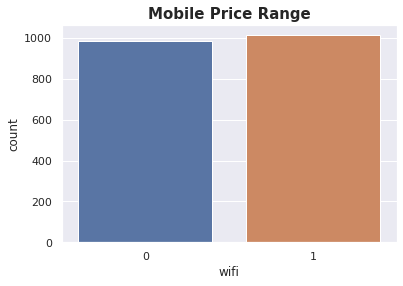

In [9]:
sns.set_theme(style="darkgrid")
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='wifi')
plt.title('Mobile Price Range', fontsize=15, fontweight='bold')
plt.show()

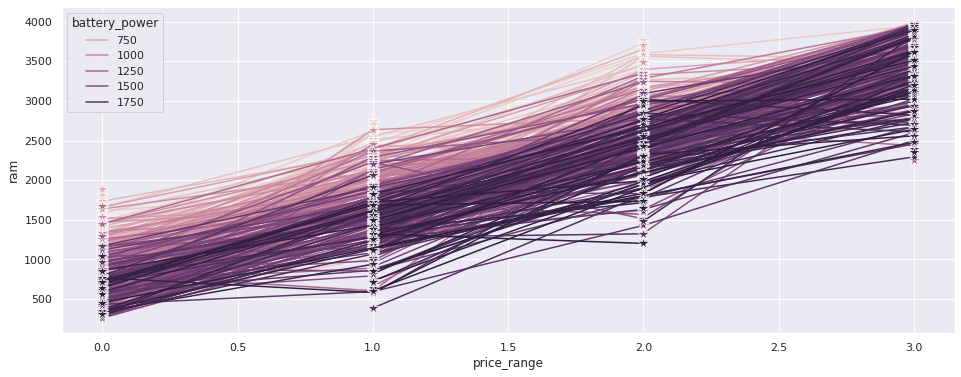

In [10]:
plt.figure(figsize=[16, 6])
sns.lineplot(x="price_range", y="ram", data=train, hue='battery_power', marker = '*', ms=13, ci=None)
plt.show()

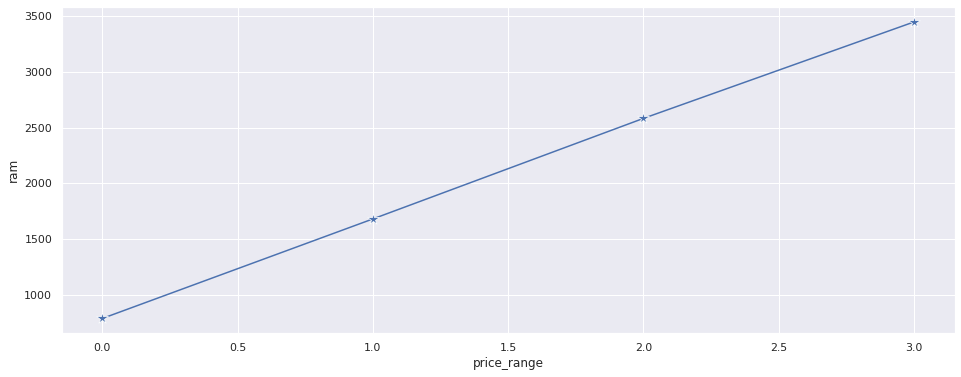

In [11]:
plt.figure(figsize=[16, 6])
sns.lineplot(x="price_range", y="ram", data=train, marker = '*', ms=13, ci=None)
plt.show()

**Price Range is depended on Ram. Increasing of Ram also increase Price**

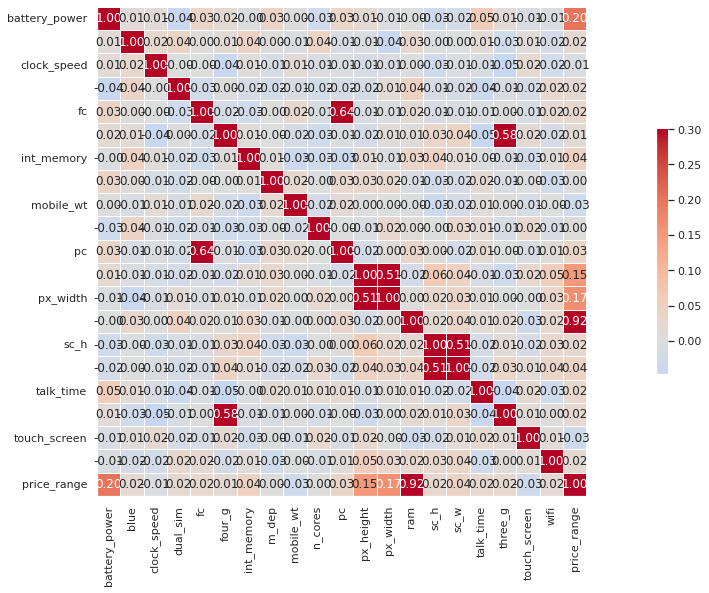

In [12]:
corr = train.corr()
g = sns.heatmap(corr, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(25,9)
plt.show()

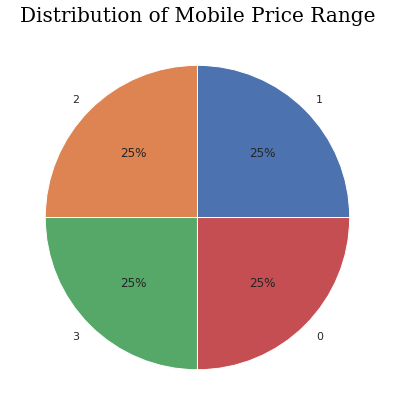

In [13]:
a = ((train['price_range'] == 0).sum() / train['price_range'].count() * 100), ((train['price_range'] == 1).sum() / train['price_range'].count() * 100), ((train['price_range'] == 2).sum() / train['price_range'].count() * 100), ((train['price_range'] == 3).sum() / train['price_range'].count() * 100)
font1 = {'family':'serif','color':'black','size':20}
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(a, labels = train['price_range'].unique(),explode = [0, 0, 0, 0], autopct='%1.0f%%')
plt.title("Distribution of Mobile Price Range", fontdict = font1)
plt.show()

# Giving Data to Machine Learning algorithms

In [14]:
X = train.drop(['price_range'], axis=1) # Features
y = train['price_range'] # Label
X_test = test.drop(['id'], axis=1) # Test Features
X.shape, y.shape, X_test.shape

((2000, 20), (2000,), (1000, 20))

**Decision Tree**

In [15]:
def dt_classifer(X, y):
    list = []
    # Split data in train_test_split
    print("First we split data with train_test_split and kfolds: ")
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=11)
    # Find best parameters for decision tree
    print("Lets findout best parameters for decision tree: ")
    dt_classifier = DecisionTreeClassifier()
    param_dist = {"max_depth": [3, 10],
              "random_state": [3, 11],
              "max_features": range(1, 11),
            "splitter": ["best", "random"], 
              "min_samples_split": range(2, 11),
              "criterion": ["gini", "entropy"]}
    random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5)
    random_search.fit(X_train, y_train)
    print("best parameters: ", random_search.best_params_)
    print("best parameters score: ", random_search.best_score_ * 100)
    # Save the dict in list
    for v in random_search.best_params_.values():
        list.append(v)
    
    # Give parameters to Decision tree with train_test_split
    print("Now we use this parameters in our model: ")
    dt_classifier = DecisionTreeClassifier(splitter= list[0], random_state=list[1], min_samples_split=list[2], max_features=list[3], max_depth=list[4], criterion=list[5])
    dt_classifier.fit(X_train, y_train)
    y_pred_dt = dt_classifier.predict(X_test)
    dt_test_accuracy = accuracy_score(y_test, y_pred_dt)
    dt_train_acc = cross_val_score(dt_classifier, X_train, y_train)
    print("Model Accuracy with train_test_split: ", dt_test_accuracy * 100)
    
    # Give same parameters to kfold splitting
    kfolds = KFold(n_splits=10, random_state=7, shuffle=True)
    model = DecisionTreeClassifier(splitter= list[0], random_state=list[1], min_samples_split=list[2], max_features=list[3], max_depth=list[4], criterion=list[5])
    score = cross_val_score(model, X, y, cv=kfolds)
    print("Accuracy of model with Kfolds: ",(score.mean()*100))


dt_classifer(X, y)

First we split data with train_test_split and kfolds: 
Lets findout best parameters for decision tree: 
best parameters:  {'splitter': 'best', 'random_state': 11, 'min_samples_split': 5, 'max_features': 7, 'max_depth': 10, 'criterion': 'entropy'}
best parameters score:  81.14285714285717
Now we use this parameters in our model: 
Model Accuracy with train_test_split:  76.83333333333333
Accuracy of model with Kfolds:  82.10000000000001


In [16]:
# Splitting Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

**KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

# training a knn model
knn.fit(X_train,y_train)
a = knn.predict(X_test)
print("KNN Score: ", knn.score(X_train, y_train) * 100)
print("KNN Accuracy: ", accuracy_score(y_test, a) * 100)

KNN Score:  93.35714285714286
KNN Accuracy:  92.5


**XGBoost**

In [18]:
xgb_classifier = XGBClassifier(random_state=11, verbosity = 0)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_train_acc = cross_val_score(xgb_classifier, X_train, y_train)
print("XGBoost Accuracy: ", xgb_accuracy * 100)
print(xgb_train_acc * 100)

XGBoost Accuracy:  90.66666666666666
[90.         88.21428571 88.92857143 92.85714286 88.57142857]


**Random Forest**

In [19]:
random_forest = RandomForestClassifier(max_depth=7)
random_forest.fit(X_train, y_train)
random_pred = random_forest.predict(X_test)
random_test_score = accuracy_score(y_test, random_pred)
acc_random = cross_val_score(random_forest, X_train, y_train, cv=5)
print(random_test_score * 100)
print(acc_random * 100)

83.66666666666667
[85.35714286 84.28571429 84.64285714 87.5        86.42857143]


**Lets Findout Importance Feature**

In [20]:
clf = RandomForestClassifier(100)
clf.fit(X_train, y_train)
feature_importance = pd.DataFrame({'importance': clf.feature_importances_}, index= X.columns).sort_values('importance')
feature_importance

,importance
three_g,0.006415
dual_sim,0.006635
wifi,0.006853
blue,0.007136
four_g,0.007301
touch_screen,0.007529
n_cores,0.024337
fc,0.024849
m_dep,0.025989
sc_h,0.027614


<AxesSubplot:>

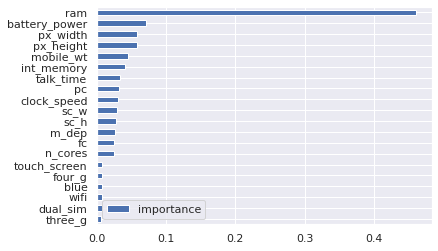

In [21]:
feature_importance.plot.barh()

In [22]:
X1 = train.drop(['price_range', 'three_g', 'wifi', 'four_g', 'blue', 'dual_sim', 'touch_screen'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=11)
random_forest = RandomForestClassifier(max_depth=7)
random_forest.fit(X_train, y_train)
random_pred = random_forest.predict(X_test)
random_test_score = accuracy_score(y_test, random_pred)
acc_random = cross_val_score(random_forest, X_train, y_train, cv=5)
print(random_test_score * 100)
print(acc_random * 100)

84.16666666666667
[86.78571429 86.42857143 84.28571429 86.78571429 86.78571429]


In [23]:
predictions = random_forest.predict(X_test)
predictions

array([3, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 3, 2, 1, 2, 3, 3, 3, 3, 2, 1,
       2, 2, 1, 3, 2, 0, 3, 2, 2, 1, 2, 2, 3, 3, 2, 1, 0, 0, 3, 2, 3, 2,
       3, 2, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 2, 1, 2, 1, 0, 3, 2, 1, 2, 3,
       0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 0, 0, 1, 0, 3, 1, 3, 0, 3,
       2, 3, 0, 2, 2, 3, 0, 3, 0, 0, 1, 1, 0, 1, 0, 3, 0, 2, 0, 3, 3, 3,
       0, 1, 2, 0, 2, 0, 0, 2, 3, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 3, 2, 1,
       0, 0, 1, 0, 3, 3, 2, 1, 1, 0, 0, 1, 2, 1, 3, 0, 3, 3, 2, 2, 0, 1,
       1, 0, 2, 0, 3, 3, 2, 3, 2, 0, 0, 1, 3, 3, 1, 2, 1, 1, 3, 3, 1, 0,
       0, 3, 0, 1, 1, 3, 0, 2, 0, 2, 0, 3, 1, 2, 1, 3, 0, 2, 0, 1, 1, 2,
       3, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 3, 1, 3, 0, 0, 3, 3, 1, 1, 0, 1,
       1, 3, 2, 3, 3, 1, 2, 2, 3, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 3, 0, 3, 3, 3, 0, 2, 1, 2, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1, 0,
       0, 0, 3, 3, 0, 1, 0, 3, 0, 3, 0, 2, 3, 0, 1,

**Best Algorithm for this dataset is KNN. who give 93% Accuracy.**
**I will Update my algorithms in next notebok.**
**If you like my work, please upvote and comment**